In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix as SM

from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.preprocessing import LabelBinarizer as LB
from sklearn.model_selection import GridSearchCV as GS

train_x = pd.read_csv('train_x_region.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x_region.csv')

In [249]:
train_x

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia


In [250]:
train_y

,Immigration to the United States
0,5473.0
1,11481.0
2,2466.0
3,1425.0
4,3397.0
...,...
237,46542.0
238,11867.0
239,15678.0
240,51139.0


In [251]:
test_x

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region
0,2015,Uruguay,32,6.485,1.061660,1.208900,0.811600,0.603620,0.245580,0.232400,3997006,Latin America & Caribbean
1,2017,Brazil,22,6.635,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,216577789,Latin America & Caribbean
2,2019,Poland,40,6.182,1.206000,1.438000,0.884000,0.483000,0.050000,0.117000,48520464,Europe & Central Asia
3,2016,Spain,37,6.361,6.434000,1.342530,1.129450,0.878960,0.375450,0.061370,48608228,Europe & Central Asia
4,2017,Bulgaria,105,4.714,4.624306,1.161459,1.434379,0.708218,0.289232,0.113178,9603624,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019,China,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,1584929709,East Asia & Pacific
57,2017,Australia,10,7.284,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,23403215,East Asia & Pacific
58,2018,Iran,106,4.707,1.059000,0.771000,0.691000,0.459000,0.129000,0.282000,78574546,Middle East & North Africa
59,2016,Italy,50,5.977,6.056000,1.354950,1.041670,0.851020,0.188270,0.025560,70112681,Europe & Central Asia


In [252]:
df = pd.concat([train_x, train_y], axis=1)
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region,Immigration to the United States
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia,5473.0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean,11481.0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean,2466.0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean,1425.0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean,3397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific,46542.0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia,11867.0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa,15678.0
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia,51139.0


In [253]:
corr = df.corr()
corr

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States
Year,1.000000,-0.000885,-0.004539,-0.249025,0.338014,0.035403,-0.177911,-0.212852,-0.104436,-0.021754,-0.017201
Happiness Rank,-0.000885,1.000000,-0.991314,-0.197356,-0.691598,-0.532426,-0.566554,-0.373608,-0.193258,0.224219,0.126923
Happiness Score,-0.004539,-0.991314,1.000000,0.185357,0.698523,0.513560,0.576130,0.386655,0.222629,-0.217042,-0.134443
Economy (GDP per Capita),-0.249025,-0.197356,0.185357,1.000000,-0.077192,0.608317,0.599059,0.817017,0.007325,-0.025206,-0.030175
Family,0.338014,-0.691598,0.698523,-0.077192,1.000000,0.351260,0.433370,0.029096,0.041434,-0.183352,-0.186854
Health (Life Expectancy),0.035403,-0.532426,0.513560,0.608317,0.351260,1.000000,0.538678,0.667554,0.146313,-0.122050,-0.147452
Freedom,-0.177911,-0.566554,0.576130,0.599059,0.433370,0.538678,1.000000,0.616043,0.135727,0.003389,-0.042866
Trust (Government Corruption),-0.212852,-0.373608,0.386655,0.817017,0.029096,0.667554,0.616043,1.000000,0.274673,-0.035492,-0.058378
Generosity,-0.104436,-0.193258,0.222629,0.007325,0.041434,0.146313,0.135727,0.274673,1.000000,-0.162039,-0.170803
Population Estimate,-0.021754,0.224219,-0.217042,-0.025206,-0.183352,-0.122050,0.003389,-0.035492,-0.162039,1.000000,0.445795


In [254]:
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [255]:
df.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02,242.000000
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07,13090.400826
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08,24587.371903
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05,116.000000
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06,1567.500000
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07,4167.000000
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07,12984.750000
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09,172726.000000


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              242 non-null    int64  
 1   Country                           242 non-null    object 
 2   Happiness Rank                    242 non-null    int64  
 3   Happiness Score                   242 non-null    float64
 4   Economy (GDP per Capita)          242 non-null    float64
 5   Family                            242 non-null    float64
 6   Health (Life Expectancy)          242 non-null    float64
 7   Freedom                           242 non-null    float64
 8   Trust (Government Corruption)     242 non-null    float64
 9   Generosity                        242 non-null    float64
 10  Population Estimate               242 non-null    int64  
 11  Region                            242 non-null    object 
 12  Immigrat

In [257]:
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

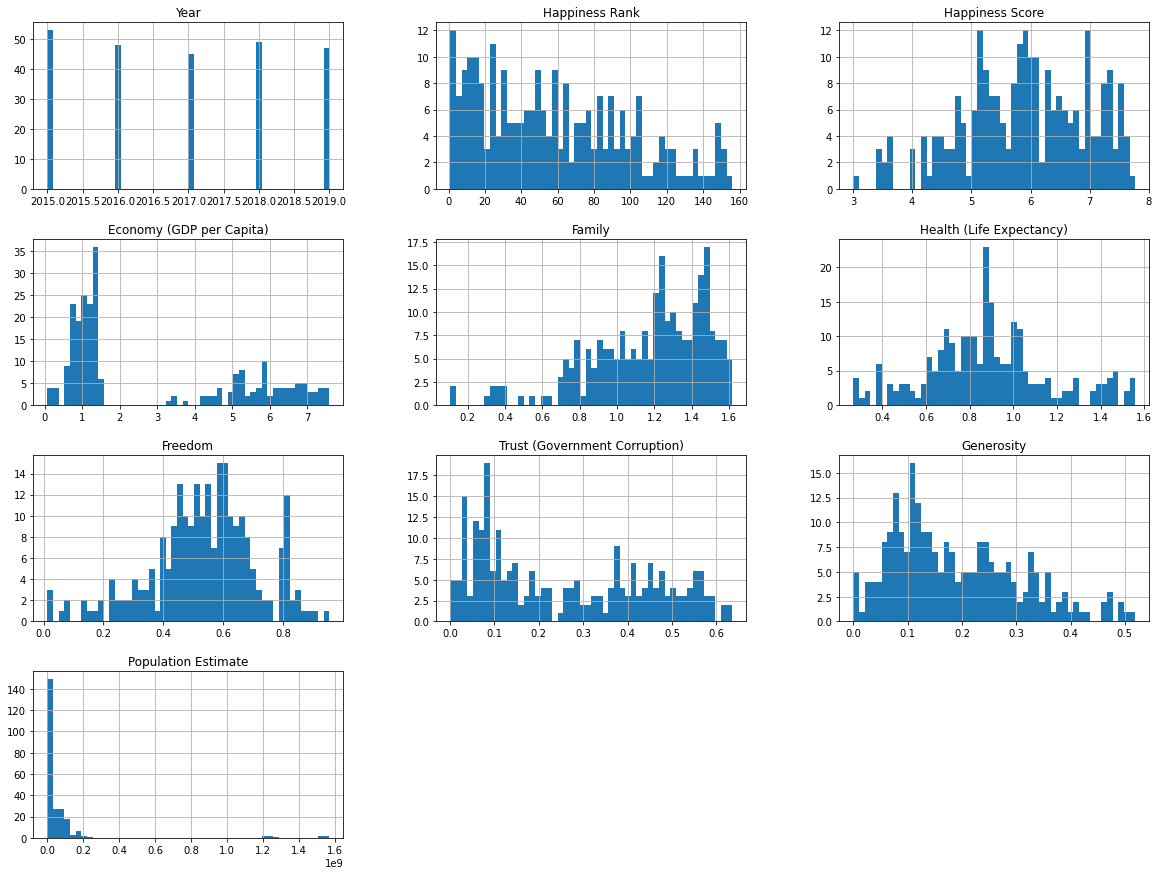

In [258]:
train_x.hist(bins=50, figsize=(20,15))
plt.show()

In [259]:
df['population_vs_gdp'] = df['Population Estimate'] / df['Economy (GDP per Capita)']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_vs_gdp                   0.354033
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [260]:
df.Region.value_counts()

Latin America & Caribbean     87
Europe & Central Asia         81
East Asia & Pacific           31
Middle East & North Africa    25
Sub-Saharan Africa            13
South Asia                     5
Name: Region, dtype: int64

In [261]:
enc = LB()
enc.fit(df.Region)
transformed_op = enc.transform(df.Region)
transformed_op

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [262]:
one_hot_df = pd.DataFrame(transformed_op)
df = pd.concat([df, one_hot_df], axis=1)
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region,Immigration to the United States,population_vs_gdp,0,1,2,3,4,5
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia,5473.0,1.132248e+07,0,1,0,0,0,0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean,11481.0,2.929156e+07,0,0,1,0,0,0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean,2466.0,4.504499e+06,0,0,1,0,0,0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean,1425.0,1.325609e+07,0,0,1,0,0,0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean,3397.0,9.815985e+05,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific,46542.0,1.877198e+07,1,0,0,0,0,0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia,11867.0,5.941882e+07,0,1,0,0,0,0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa,15678.0,1.800558e+07,0,0,0,0,0,1
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia,51139.0,1.669434e+09,0,0,0,0,1,0


In [263]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_vs_gdp                   0.354033
1                                  -0.278405
4                                   0.263632
Family                             -0.186854
Generosity                         -0.170803
2                                   0.169817
0                                   0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
3                                  -0.083913
5                                  -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [264]:
df = df.rename(columns={0: 'east_asia_and_pacific', 1: 'europe_and_central_asia', 2: 'latin_america_and_caribbean',
                       3: 'middle_east_and_north_africa', 4: 'south_asia', 5: 'sub_saharan_africa'})
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region,Immigration to the United States,population_vs_gdp,east_asia_and_pacific,europe_and_central_asia,latin_america_and_caribbean,middle_east_and_north_africa,south_asia,sub_saharan_africa
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia,5473.0,1.132248e+07,0,1,0,0,0,0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean,11481.0,2.929156e+07,0,0,1,0,0,0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean,2466.0,4.504499e+06,0,0,1,0,0,0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean,1425.0,1.325609e+07,0,0,1,0,0,0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean,3397.0,9.815985e+05,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific,46542.0,1.877198e+07,1,0,0,0,0,0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia,11867.0,5.941882e+07,0,1,0,0,0,0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa,15678.0,1.800558e+07,0,0,0,0,0,1
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia,51139.0,1.669434e+09,0,0,0,0,1,0


In [265]:
df['pop_vs_happiness'] = df['Population Estimate'] / df['Happiness Score']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
south_asia                          0.263632
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [266]:
df['pop_vs_rank'] = df['Population Estimate'] / df['Happiness Rank']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_rank                         0.454478
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
south_asia                          0.263632
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [267]:
df['pop_vs_trust'] = 1/  df['Population Estimate'] / df['Trust (Government Corruption)']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_rank                         0.454478
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
south_asia                          0.263632
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
pop_vs_trust                       -0.102012
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [268]:
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,population_vs_gdp,east_asia_and_pacific,europe_and_central_asia,latin_america_and_caribbean,middle_east_and_north_africa,south_asia,sub_saharan_africa,pop_vs_happiness,pop_vs_rank,pop_vs_trust
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,...,1.132248e+07,0,1,0,0,0,0,1.146406e+07,2.320756e+06,2.891938e-08
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,...,2.929156e+07,0,0,1,0,0,0,6.070411e+06,2.860235e+05,6.591660e-07
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,...,4.504499e+06,0,0,1,0,0,0,6.498747e+05,3.881377e+05,2.308607e-06
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,...,1.325609e+07,0,0,1,0,0,0,1.780019e+06,1.686349e+05,1.518947e-06
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,...,9.815985e+05,0,0,1,0,0,0,1.000438e+06,1.248880e+05,3.581130e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,...,1.877198e+07,1,0,0,0,0,0,1.837326e+07,1.385650e+06,1.712769e-08
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,...,5.941882e+07,0,1,0,0,0,0,1.028053e+07,6.719728e+06,1.649840e-07
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,...,1.800558e+07,0,0,0,0,0,1,1.767159e+07,6.623134e+05,3.103367e-08
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,...,1.669434e+09,0,0,0,0,1,0,3.139284e+08,9.003017e+06,9.333940e-09


In [269]:
df.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,...,population_vs_gdp,east_asia_and_pacific,europe_and_central_asia,latin_america_and_caribbean,middle_east_and_north_africa,south_asia,sub_saharan_africa,pop_vs_happiness,pop_vs_rank,pop_vs_trust
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02,...,2.420000e+02,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02,2.420000e+02,2.420000e+02
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07,...,6.783109e+07,0.128099,0.334711,0.359504,0.103306,0.020661,0.053719,1.724896e+07,1.764707e+06,1.375700e-06
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08,...,2.465565e+08,0.334893,0.472867,0.480850,0.304989,0.142542,0.225930,5.453985e+07,3.179315e+06,4.155882e-06
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05,...,4.854902e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.055423e+04,5.790404e+03,1.363767e-09
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06,...,3.655044e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.203392e+06,1.393388e+05,8.653056e-08
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07,...,1.019571e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.570074e+06,6.273642e+05,3.220098e-07
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07,...,4.054427e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.165171e+07,1.583251e+06,6.951680e-07
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09,...,1.869764e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.139284e+08,1.963209e+07,3.650147e-05


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              242 non-null    int64  
 1   Country                           242 non-null    object 
 2   Happiness Rank                    242 non-null    int64  
 3   Happiness Score                   242 non-null    float64
 4   Economy (GDP per Capita)          242 non-null    float64
 5   Family                            242 non-null    float64
 6   Health (Life Expectancy)          242 non-null    float64
 7   Freedom                           242 non-null    float64
 8   Trust (Government Corruption)     242 non-null    float64
 9   Generosity                        242 non-null    float64
 10  Population Estimate               242 non-null    int64  
 11  Region                            242 non-null    object 
 12  Immigrat

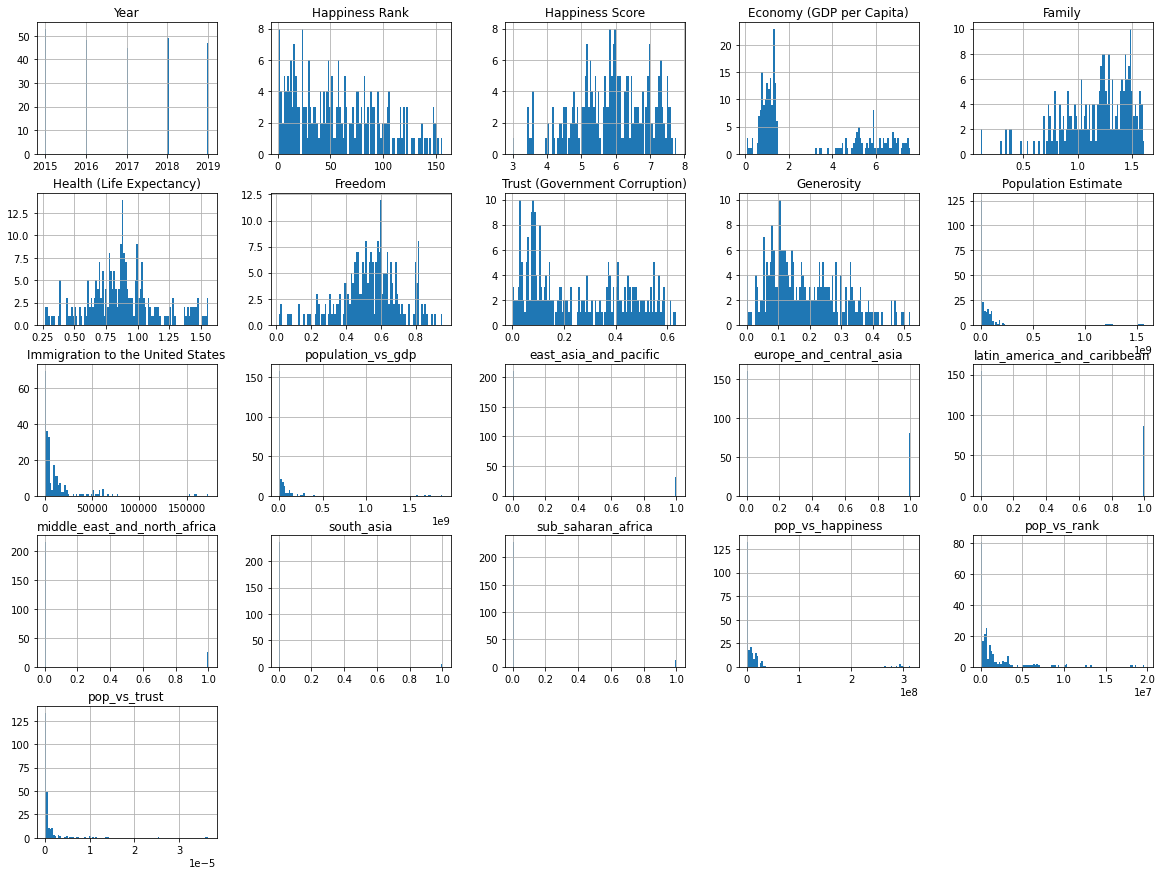

In [271]:
df.hist(bins=100, figsize=(20,15))
plt.show()

In [272]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)

In [273]:
train_labels = train_set['Immigration to the United States']
test_labels = test_set['Immigration to the United States']

In [274]:
train_features = train_set.drop(columns=['Immigration to the United States', 'Country', 'Region'])
test_features = test_set.drop(columns=['Immigration to the United States', 'Country', 'Region'])

In [275]:
reg = LR()

reg.fit(train_features, train_labels)

LinearRegression()

In [276]:
hyp = reg.predict(test_features)
hyp

array([ -8650.20524339, -12579.11998481,  16354.24354157,  -2041.60514378,
         5761.08268705,  20510.54667666,  16133.64068779,  13548.18411598,
        17835.511233  ,  17285.85817466,   3285.83127122,   9375.65011955,
           40.05866935,  19343.99392492,  -7520.88339662,  -1851.15010271,
        13336.2931113 ,   9539.64527013,  20237.60503629,  10126.73760076,
        -2484.17886016,  -2393.65728664,  16875.48558785,   2480.90719762,
        10254.50905709,     52.99642137,  22647.3455412 ,  16618.3117748 ,
        20191.83092784,  -6163.14655243,   9032.74029257,  -1696.17562835,
         2288.20458807,   3111.76988818,   5511.81524406,  14446.86366697,
        20210.74912845,  13967.85492189,   7281.88501881,   9642.90388313,
         8249.81544641,   8291.50328534,  15959.11380348,  12650.89476105,
        17149.51819318,  16714.3487669 ,   7280.43489003,   9165.08316543])

In [277]:
np.sqrt(MSE(test_labels, hyp))

10514.064718938636

In [278]:
ridge = Ridge(alpha=.0001)
ridge.fit(train_features, train_labels)
np.sqrt(MSE(test_labels, ridge.predict(test_features)))

/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16355e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


10345.368985779853

In [279]:
lasso = Lasso(alpha=.0001)
lasso.fit(train_features, train_labels)
np.sqrt(MSE(test_labels, lasso.predict(test_features)))

/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43856610417.52735, tolerance: 13880665.771322163
  model = cd_fast.enet_coordinate_descent(


10550.314782344214

In [280]:
r_params = { "alpha" : [1e-3, 1e-4, 1e-5, 1e-6, 10, 15, 50, 100, 1000] }

ridge = Ridge()
r_reg = GS(ridge, r_params, scoring='neg_mean_squared_error', cv=20)
r_reg.fit(train_features, train_labels)

/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17251e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17561e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17078e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.17661e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAl

GridSearchCV(cv=20, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.0001, 1e-05, 1e-06, 10, 15, 50, 100,
                                   1000]},
             scoring='neg_mean_squared_error')

In [281]:
np.sqrt(abs(r_reg.best_score_)) # actually worse than regular linear regression??

23812.085392590667

In [282]:
r_reg.best_params_

{'alpha': 50}

In [283]:
l_params = { "alpha" : [1e-3, 0.01, 0.1, 1, 10, 15, 50, 100, 150, 200, 250, 300, 1000] }

lasso = Lasso()
l_reg = GS(lasso, l_params, scoring='neg_mean_squared_error', cv=20)
l_reg.fit(train_features, train_labels)

/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35045846082.20352, tolerance: 11461085.851365218
  model = cd_fast.enet_coordinate_descent(
/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42809616976.37694, tolerance: 13640877.082508154
  model = cd_fast.enet_coordinate_descent(
/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43375991236.89183, tolerance: 13731888.64212174
  model = cd_fast.enet_coordinate_descent(
/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/

GridSearchCV(cv=20, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 150,
                                   200, 250, 300, 1000]},
             scoring='neg_mean_squared_error')

In [284]:
np.sqrt(abs(l_reg.best_score_)) # actually worse than regular linear regression??

23836.681357737638

In [285]:
l_reg.best_params_

{'alpha': 1000}

In [286]:
p2 = PF(degree=2)
poly_x = p2.fit_transform(train_features)
regp2 = LR()
regp2.fit(poly_x, train_labels)

poly_test_x = p2.transform(test_features)

np.sqrt(MSE(test_labels, regp2.predict(poly_test_x))) # way worse than normal linear regression

119669.32298579966

In [287]:
p3 = PF(degree=3)
poly_x3 = p3.fit_transform(train_features)
regp3 = LR()
regp3.fit(poly_x3, train_labels)

poly_test_x3 = p3.fit_transform(test_features)

np.sqrt(MSE(test_labels, regp3.predict(poly_test_x3))) # terrible performance, worse than normal linear regression

8407896.849603286

## File creation for test labels

In [288]:
# I will be using penalized regression (LASSO) to predict the test labels from the given dataset
# because it gave the best performance from all of the regression models I have tried so far

lasso = Lasso(alpha=.0001)
lasso.fit(train_x.drop(columns=['Region', 'Country']), train_y)

np.savetxt("test_y.csv", lasso.predict(test_x.drop(columns=['Region', 'Country'])), delimiter=',')

/Users/y.solomon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53527916420.72719, tolerance: 14569386.455611985
  model = cd_fast.enet_coordinate_descent(
